In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing packages for modeling
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
%tensorflow_version 2.x

# Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
train_set = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NNP2019/Training_set/train_labels5.csv') # using One-hot encodding for labeling the images that will be linked
train_set.head()

,Id,Letter,অ,আ,ই,ঈ,উ,ঊ,ঋ,এ,ঐ,ও,ঔ,ক,খ,গ,ঘ,ঙ,চ,ছ,জ,ঝ,ঞ,ট,ঠ,ড,ঢ,ণ,ত,থ,দ,ধ,ন,প,ফ,ব,ভ,ম,য,র,ল,শ,ষ,স,হ,ড়,ঢ়,য়
0,bw1,"['ল', 'ম', 'য়']",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,bw2,"['আ', 'দ', 'ব']",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,bw3,"['ই', 'র']",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,bw4,"['র', 'ক', 'ব']",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,bw5,"['আ', 'ম']",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
train_set.shape

(107, 48)

In [5]:
train_set_images = []

for i in tqdm(range(train_set.shape[0])):
    
    img = image.load_img('/content/drive/My Drive/Colab Notebooks/NNP2019/Training_set/Images_grayscale/' + train_set['Id'][i] + '.jpg', target_size=(1000,1000), color_mode="grayscale") # the larger image size, the more chance of accuracy we found, it takes more time though to train.
    img = image.img_to_array(img)
    img = img/255.0
    train_set_images.append(img)

X = np.array(train_set_images) # X is our train_data
img_row, img_col = X.shape[1], X.shape[2] # since X is shaped as [num_of_img, img_row, img_col, img_depth]


100%|██████████| 107/107 [00:37<00:00,  3.27it/s]


In [6]:
# Creating training labels for our images, by only keeping all possible label options, and dropping Id and Letter column
y = np.array(train_set.drop(['Id', 'Letter'],axis=1))
y.shape

(107, 46)

In [0]:
# Creating validation set to evaluate performance
train_data, test_data, train_labels, test_labels = train_test_split(X, y, random_state=40, test_size=0.10)

In [0]:
model = Sequential()

model.add( Conv2D(filters=23, kernel_size=(3,3), activation='relu', input_shape=(img_row, img_col, 1)))
model.add( MaxPooling2D(pool_size=(2, 2))) # summarizing groups of pixels into their maximum values in each group
model.add( Dropout(0.50))

model.add( Conv2D(filters=23, kernel_size=(3,3), activation='relu')) #doesn't require input_shape keyword again as this layer receives inputs from the first convolutional layer
model.add( MaxPooling2D(pool_size=(2, 2)))
model.add( Dropout(0.50)) # In this time, increasing this and see

model.add( Flatten()) # to connect the convolutional layers to the dense layers by flattening and feeding it to fully connected network

model.add( Dense (50, activation='relu'))
model.add( Dropout (0.50))
model.add( Dense (50, activation='relu'))

model.add( Dense (46, activation='sigmoid')) # since the output is one or more of 46 class-categories of bangla letters/symbols
                                            # 'softmax' won't be able to do that. sigmoid works better in this case.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 998, 998, 23)      230       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 499, 499, 23)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 499, 499, 23)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 497, 497, 23)      4784      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 248, 248, 23)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 248, 248, 23)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1414592)          

In [0]:
# Compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fitting the training data
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)




Train on 76 samples, validate on 20 samples
Epoch 1/3





76/76 [==============================] - 85s 1s/step - loss: 4.6925 - acc: 0.5932 - val_loss: 2.5109 - val_acc: 0.6967
Epoch 2/3
76/76 [==============================] - 77s 1s/step - loss: 3.7514 - acc: 0.6642 - val_loss: 0.5342 - val_acc: 0.7272
Epoch 3/3
76/76 [==============================] - 79s 1s/step - loss: 0.9652 - acc: 0.7137 - val_loss: 0.6837 - val_acc: 0.9511


In [12]:
# Evaluating the model on test data 
model.evaluate(test_data, test_labels, batch_size=10)

11/11 [==============================] - 3s 268ms/step


[0.6836994615468112, 0.9505928754806519]

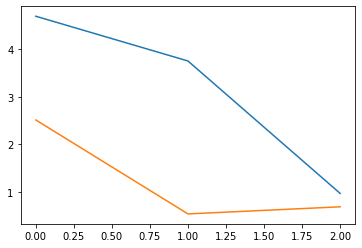

In [13]:
plt.plot(training.history['loss']) #blue line == training loss
plt.plot(training.history['val_loss']) #orange line == validation loss
plt.show()

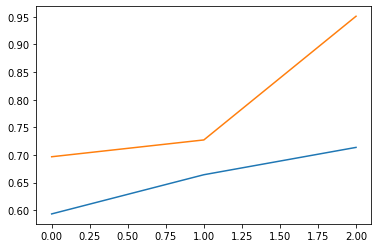

In [14]:
plt.plot(training.history['acc']) #blue line == training accuracy
plt.plot(training.history['val_acc']) #orange line == validation accuracy
plt.show()

In [16]:
img = image.load_img('/content/drive/My Drive/Colab Notebooks/NNP2019/Test_set/10.jpg',target_size=(1000,1000,1), color_mode="grayscale")
img = image.img_to_array(img) # Image was "e, for ek(1)" CORRECT!!!
img = img/255

classes = np.array(train_set.columns[2:])
probability = model.predict(img.reshape(1,1000,1000,1))
top_5_letters_symbols = np.argsort(probability[0])[:-6:-1]
for i in range(5):
    print("{}".format(classes[top_5_letters_symbols[i]])+" ({:.4})".format(probability[0][top_5_letters_symbols[i]]))

য় (0.4993)
স (0.4982)
ম (0.498)
এ (0.4979)
থ (0.4975)
